In [1]:
import requests

import torch
from PIL import Image, ImageDraw
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection 
import matplotlib.pyplot as plt 
import cv2

In [2]:
model_id = "IDEA-Research/grounding-dino-base"

if torch.cuda.is_available():
    device = "cuda" 
elif torch.backends.mps.is_available():
    device = "mps" 
else:
    device = "cpu"

processor = AutoProcessor.from_pretrained(model_id)


In [3]:
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

In [4]:
image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open("/Users/jli28/Desktop/FRC_images/REEF.jpg")

# Check for cats and remote controls
# VERY important: text queries need to be lowercased + end with a dot
text = "a cat. a remote control."

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.3,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)


In [5]:
results

[{'scores': tensor([0.3265, 0.3490, 0.4424, 0.4128], device='mps:0'),
  'labels': ['a remote control', 'a remote control', 'a cat', 'a cat'],
  'boxes': tensor([[332.1690,  74.3646, 370.2432, 187.7556],
          [ 38.3407,  70.0145, 176.3035, 117.3221],
          [342.7056,  22.1020, 636.2104, 376.4962],
          [  9.5384,  50.8408, 317.4218, 472.4852]], device='mps:0')}]

In [6]:
draw = ImageDraw.Draw(image)
for bb in results[0]['boxes']:
    bb = bb.cpu().numpy()
    print(bb)
    
    draw.rectangle([(bb[0],bb[1]),(bb[2],bb[3])], outline ="yellow")
    #image = cv2.rectangle(image, (bb[0],bb[1]), (bb[2],bb[3]), color, thickness)


[332.16904  74.36456 370.24323 187.75557]
[ 38.340702  70.014496 176.30354  117.3221  ]
[342.70557  22.10199 636.21045 376.49615]
[  9.538364  50.840763 317.4218   472.48517 ]


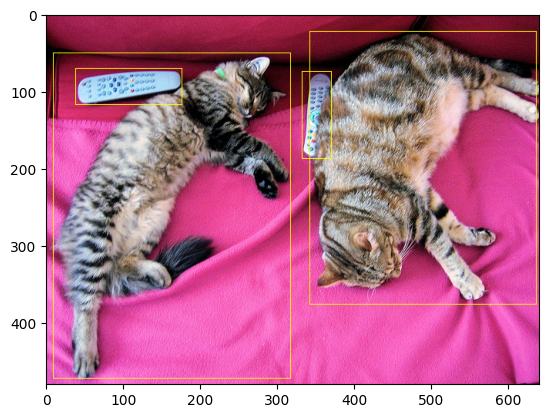

In [7]:
plt.imshow(image)